In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10 =tf.keras.datasets.cifar10
(x_train,y_train), (x_test,y_test) =cifar10.load_data()
input_shape=(32,32,3)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
 x_train=x_train.reshape(x_train.shape[0], 32, 32, 3)
 x_test =x_test.reshape(x_test.shape[0], 32, 32, 3)

In [4]:
x_train=x_train / 255
x_test=x_test / 255

print("Shape of Training: ",x_train.shape)
print("Shape of Testing: ",x_test.shape)

Shape of Training:  (50000, 32, 32, 3)
Shape of Testing:  (10000, 32, 32, 3)


In [5]:
model= Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       1,440,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,443,106 (5.51 MB)

 Trainable params: 1,443,106 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.optimizers import SGD
sgd=SGD(0.01)

In [8]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.2816 - loss: 1.9971
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.4195 - loss: 1.6411


In [9]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4895 - loss: 1.4591
Loss=1.459
Accuracy=0.489


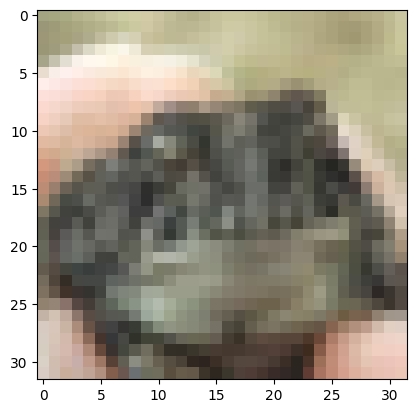

In [10]:
image= x_train[25]
plt.imshow(np.squeeze(image), cmap="gray")

In [11]:
image=image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
image.shape

(1, 32, 32, 3)

In [12]:
predict_model = model.predict([image])
print("Pedicted class: {}".format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Pedicted class: 3


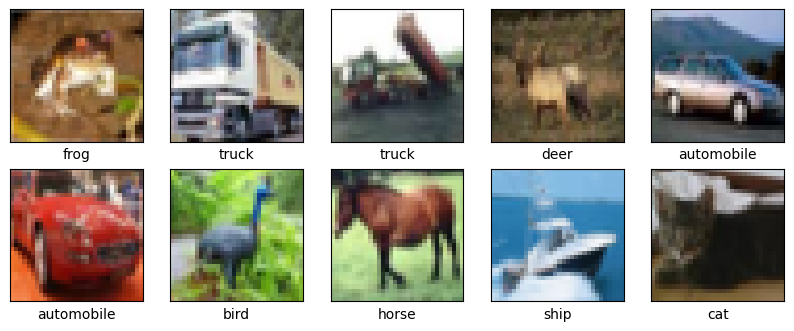

In [13]:
class_names = ['airplpane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()